### GENDER ANALYSIS ###

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset_1_clean.csv')
df.rename(columns={'video_key': 'Path'}, inplace=True)
df.head()

,Unnamed: 0,Path,child_id,ASD,age,gender
0,0,%2B07758486393/1637011476385/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
1,1,%2B07758486393/1637011774510/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
2,2,%2B07758486393/1637011884828/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
3,3,%2B07766544436/1626976603665/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male
4,4,%2B07766544436/1626976728265/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male


In [4]:
import numpy as np

# Functions to calculate metrics
def calculate_metrics(df):
    metrics = {}
    count = len(df)
    metrics['count'] = count
    return pd.Series(metrics)

# Calculate metrics for each gender
metrics_by_gender = df.groupby('gender').apply(calculate_metrics).reset_index()

print(metrics_by_gender)


   gender  count
0  Female    775
1    Male   2277
2   Other      5


In [5]:
metrics_by_gender.to_csv('results/full_dataset_by_gender.csv', index=False) 

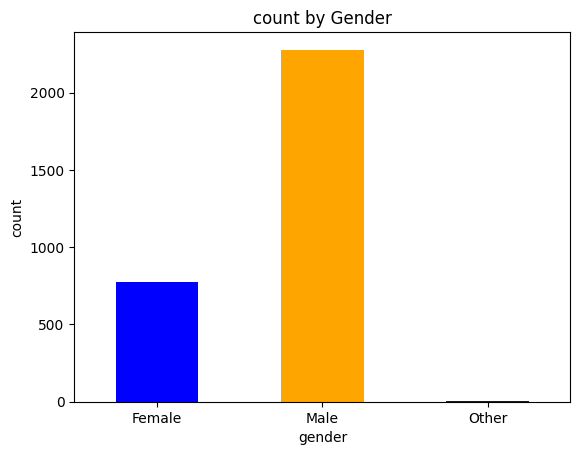

In [6]:
import matplotlib.pyplot as plt

# Plotting function
def plot_metrics(metrics_df, metric_name):
    metrics_df.set_index('gender')[metric_name].plot(kind='bar', color=['blue', 'orange'])
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} by Gender')
    plt.xticks(rotation=0)
    plt.savefig(f'results/full_dataset_{metric_name}_by_gender.png')
    plt.show()

# Plot all metrics
metrics_list = ['count']

for metric in metrics_list:
    plot_metrics(metrics_by_gender, metric)


### AGE ANALYSIS ###

In [7]:
# Define age buckets
bins = [0, 3, 6, 9, float('inf')]
labels = ['0-3', '4-6', '7-9', '9+']
df['Age Bucket'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,Unnamed: 0,Path,child_id,ASD,age,gender,Age Bucket
0,0,%2B07758486393/1637011476385/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female,0-3
1,1,%2B07758486393/1637011774510/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female,0-3
2,2,%2B07758486393/1637011884828/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female,0-3
3,3,%2B07766544436/1626976603665/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male,9+
4,4,%2B07766544436/1626976728265/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male,9+


In [8]:
metrics_by_age_bucket = df.groupby('Age Bucket').apply(calculate_metrics).reset_index()
print(metrics_by_age_bucket)

  Age Bucket  count
0        0-3    946
1        4-6    949
2        7-9    598
3         9+    624


In [9]:
metrics_by_age_bucket.to_csv('results/full_dataset_by_age.csv', index=False) 

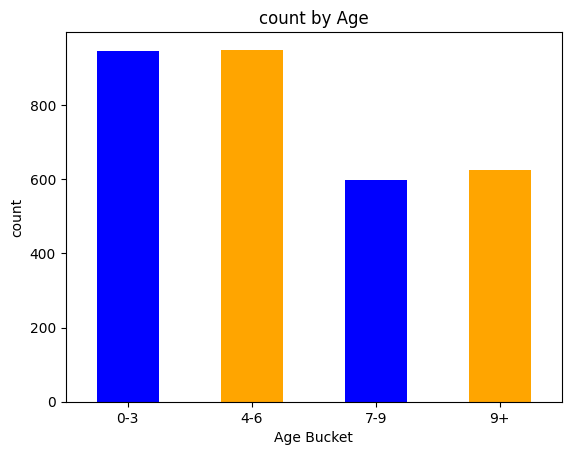

In [10]:
# Plotting function
def plot_metrics(metrics_df, metric_name):
    metrics_df.set_index('Age Bucket')[metric_name].plot(kind='bar', color=['blue', 'orange'])
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} by Age')
    plt.xticks(rotation=0)
    plt.savefig(f'results/full_dataset_{metric_name}_by_age.png')
    plt.show()

metrics_list = ['count']

for metric in metrics_list:
    plot_metrics(metrics_by_age_bucket, metric)